In [241]:
import pandas as pd

# db = pd.read_csv('../features_db.csv')
db = pd.read_csv('/home/ankitb/Downloads/features0.csv')
# db = pd.read_csv('/home/ankitb/Downloads/features1.csv')
db.sample(frac=0.2)
db.head()

db.columns


Index(['Class', 'Object Number', 'Area_M01', 'Area_M02', 'Area_M03',
       'Area_M06', 'Area_M07', 'Area_M09', 'Area_M11', 'Area_MC',
       'Aspect Ratio Intensity_M01_Ch01', 'Aspect Ratio Intensity_M02_Ch02',
       'Aspect Ratio Intensity_M03_Ch03', 'Aspect Ratio Intensity_M06_Ch06',
       'Aspect Ratio Intensity_M07_Ch07', 'Aspect Ratio Intensity_M09_Ch09',
       'Aspect Ratio Intensity_M11_Ch11', 'Aspect Ratio_M01',
       'Aspect Ratio_M02', 'Aspect Ratio_M03', 'Aspect Ratio_M06',
       'Aspect Ratio_M07', 'Aspect Ratio_M09', 'Aspect Ratio_M11',
       'Gradient RMS_M01_Ch01', 'Gradient RMS_M02_Ch02',
       'Gradient RMS_M03_Ch03', 'Gradient RMS_M06_Ch06',
       'Gradient RMS_M07_Ch07', 'Gradient RMS_M09_Ch09',
       'Gradient RMS_M11_Ch11', 'Modulation_M01_Ch01', 'Modulation_M02_Ch02',
       'Modulation_M03_Ch03', 'Modulation_M06_Ch06', 'Modulation_M07_Ch07',
       'Modulation_M09_Ch09', 'Modulation_M11_Ch11', 'Bkgd Mean_Ch01',
       'Bkgd Mean_Ch02', 'Bkgd Mean_Ch03',

In [237]:
from BioAnalysis import BioAnalysis
import numpy as np
from tqdm import tqdm, trange

analysis = BioAnalysis()

filtered = analysis.getFilteredIndices()

filtered_db = pd.DataFrame(columns=db.columns)

for row in filtered:
    filtered_db = filtered_db.append(db[(db.Class == int(row[0])) & (db["Object Number"]==int(row[1]))])



Intensity_MC_Ch07 0.203
Max Pixel_MC_Ch02 0.075
Max Pixel_MC_Ch03 0.067
Intensity_MC_Ch02 0.054
Max Pixel_MC_Ch07 0.049
Aspect Ratio Intensity_M03_Ch03 0.046
Aspect Ratio_M01 0.045
Intensity_MC_Ch03 0.045
Aspect Ratio_M03 0.037
Area_M01 0.036
0.7560752762643631


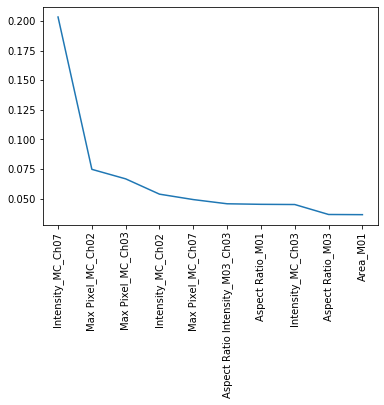

In [242]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# new_db = filtered_db
new_db = db
new_db.sample(frac=1)
indexNames = new_db[ (new_db['Intensity_MC_Ch02'] < 0) 
                   & (new_db['Intensity_MC_Ch07'] < 0)
                   & (new_db['Aspect Ratio_M01'] <0.8)].index
new_db.drop(indexNames , inplace=True)

Y = new_db.Intensity_MC_Ch11.to_numpy()
Y = Y>0
X = new_db.drop(['Class', 'Object Number',], axis=1)
# X = X.drop(['Mean Pixel_M01_Ch01'], axis=1)
X = X.drop([i for i in X.columns if "Ch01" in i] , axis=1)
X = X.drop([i for i in X.columns if "Ch09" in i] , axis=1)
X = X.drop([i for i in X.columns if "Ch06" in i] , axis=1)
X = X.drop([i for i in X.columns if "Ch11" in i] , axis=1)
X = X.drop([i for i in X.columns if "M11" in i] , axis=1)
# X = X.drop([i for i in X.columns if "Modulation" in i] , axis=1)
X = X.drop([i for i in X.columns if "Bkgd Mean" in i] , axis=1)


X = X.drop(X.columns[X.isna().any()].tolist(), axis=1)


clf = DecisionTreeClassifier(criterion='entropy')
sol = clf.fit(X.to_numpy(),Y.astype('int'))
#print((sol.feature_importances_))

imp = sol.feature_importances_
features = {}
for i in range(0,10):
    print(X.columns[np.argmax(imp)] + ' ' + '{:0.3f}'.format(np.max(imp)))
    features[X.columns[np.argmax(imp)]] = np.max(imp)
    imp[np.argmax(imp)] = 0
    
names = list(features.keys())
values = list(features.values())
plt.plot(names, values)
plt.xticks(rotation=90)
    

s = cross_val_score(clf, X.to_numpy(), Y.astype('int'), cv=20, n_jobs=-1)
print(np.mean(s))


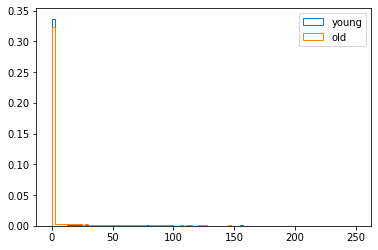

7.619912705631679e-14
young:1828
old:2147
(9604,)
(9193,)


In [244]:
from scipy.stats import mannwhitneyu
kl_young = new_db[(new_db.Class ==1)].Intensity_MC_Ch11
kl_old = new_db[(new_db.Class ==0)].Intensity_MC_Ch11
kl_young[(kl_young<0)] = 0
kl_old[(kl_old<0)] = 0
plt.hist(kl_young,bins=100, range=(0.0,250),histtype='step', density=True)
plt.hist(kl_old,bins=100, range=(0.0,250), histtype='step', density=True)
plt.legend(['young', 'old'])
plt.show()
print(mannwhitneyu(kl_young, kl_old)[1])
print('young:' + str(np.count_nonzero(kl_young)))
print('old:' + str(np.count_nonzero(kl_old)))
print(kl_young.shape)
print(kl_old.shape)

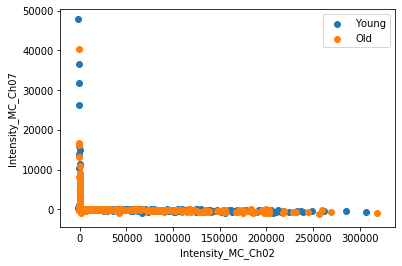

In [163]:
feature_1 = 'Bkgd Mean_Ch01'
feature_2 = 'Bkgd Mean_Ch09'
feature_1 = 'Intensity_MC_Ch02'
feature_2 = 'Intensity_MC_Ch07'
new_db = db
# indexNames = new_db[ (new_db['Aspect Ratio_M01'] > 0.7) & (new_db['Aspect Ratio_M01'] <1) ].index
# new_db.drop(indexNames , inplace=True)
X = new_db[['Class', feature_1]]
Y = new_db[['Class', feature_2]]
test = X.sample(frac=1)


Y_young = Y.drop(Y[(Y.Class ==0)].index)
Y_old = Y.drop(Y[(Y.Class == 1)].index)

X_young = X.drop(X[(X.Class ==0)].index)
X_old = X.drop(X[(X.Class ==1)].index)

import matplotlib.pyplot as plt
# print(X_old)
# print(Y_old)
plt.scatter(X_young[feature_1], Y_young[feature_2])
plt.scatter(X_old[feature_1], Y_old[feature_2])

plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.legend(['Young', 'Old'])
plt.show()

In [230]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

new_db = filtered_db
new_db.sample(frac=1)

Y = new_db.Class.to_numpy()
X = new_db.drop(['Class', 'Object Number','Mean Pixel_M01_Ch01'], axis=1)
X = X.drop([i for i in X.columns if "Ch01" in i] , axis=1)
X = X.drop([i for i in X.columns if "Ch09" in i] , axis=1)
X = X.drop([i for i in X.columns if "Ch06" in i] , axis=1)
X = X.drop([i for i in X.columns if "Bkgd Mean" in i] , axis=1)


clf = svm.SVC()

s = cross_val_score(clf, X.to_numpy(), Y.astype('int'), cv=10)
print(np.mean(s))


/home/ankitb/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ankitb/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ankitb/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ankitb/anaconda3/lib/python3.7/site-packages/skle

0.5391303774070242


In [245]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score

new_db = filtered_db
new_db.sample(frac=1)

Y = new_db.Class.to_numpy()
X = new_db.drop(['Class', 'Object Number','Mean Pixel_M01_Ch01'], axis=1)
X = X.drop([i for i in X.columns if "Ch01" in i] , axis=1)
X = X.drop([i for i in X.columns if "Ch09" in i] , axis=1)
X = X.drop([i for i in X.columns if "Ch06" in i] , axis=1)
X = X.drop([i for i in X.columns if "Bkgd Mean" in i] , axis=1)


clf = KNeighborsClassifier()

s = cross_val_score(clf, X.to_numpy(), Y.astype('int'), cv=4000, n_jobs=-1)
print(np.mean(s))

0.6022916666666667


In [232]:
from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.model_selection import cross_val_score

new_db = filtered_db
new_db.sample(frac=1)

Y = new_db.Class.to_numpy()
X = new_db.drop(['Class', 'Object Number','Mean Pixel_M01_Ch01'], axis=1)
X = X.drop([i for i in X.columns if "Ch01" in i] , axis=1)
X = X.drop([i for i in X.columns if "Ch09" in i] , axis=1)
X = X.drop([i for i in X.columns if "Ch06" in i] , axis=1)
X = X.drop([i for i in X.columns if "Bkgd Mean" in i] , axis=1)


clf = GaussianProcessClassifier()

s = cross_val_score(clf, X.to_numpy(), Y.astype('int'), cv=10)
print(np.mean(s))

KeyboardInterrupt: 